In [21]:
from music21 import converter

scores = dict()

progressions = [
    "c8 d e c d e f d e f g e f g a f g a b g a b c' a "
    "b c' b c' b c' a b c' b a c' b a g b a g f a g f e g "
    "f e d f e d c e d e f g f g a b c'4 b8 a g f e d "
    "c1",
]

scores['C'] = converter.parse(
    "tinyNotation: 4/4 " + progressions[0]
)
scores['C'].write('midi', '/home/jovyan/work/example.mid')
scores['C'].show('midi', '/home/jovyan/work/example.mid')


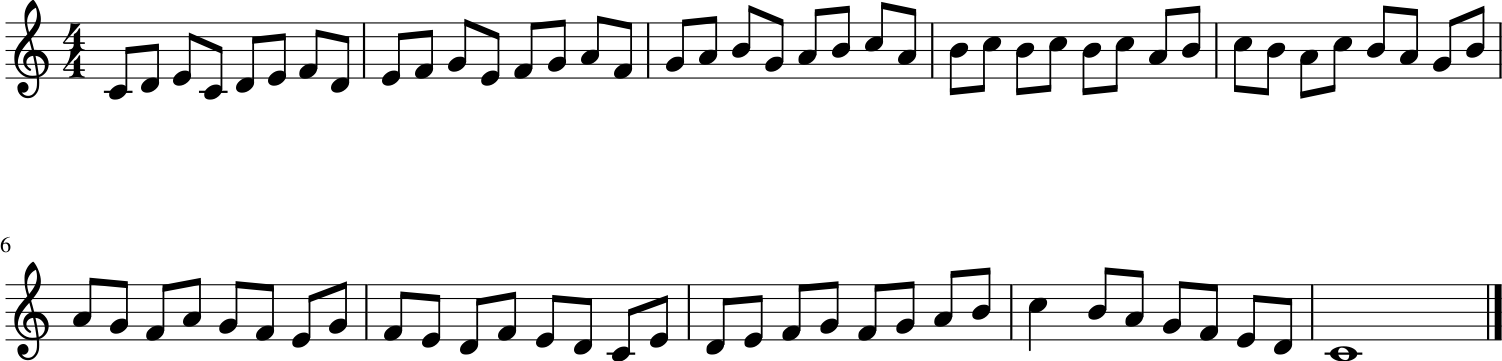

In [22]:
scores['C'].show()

In [3]:
scores['C'].show('musicxml.png', '/home/jovyan/work/example.mxl')

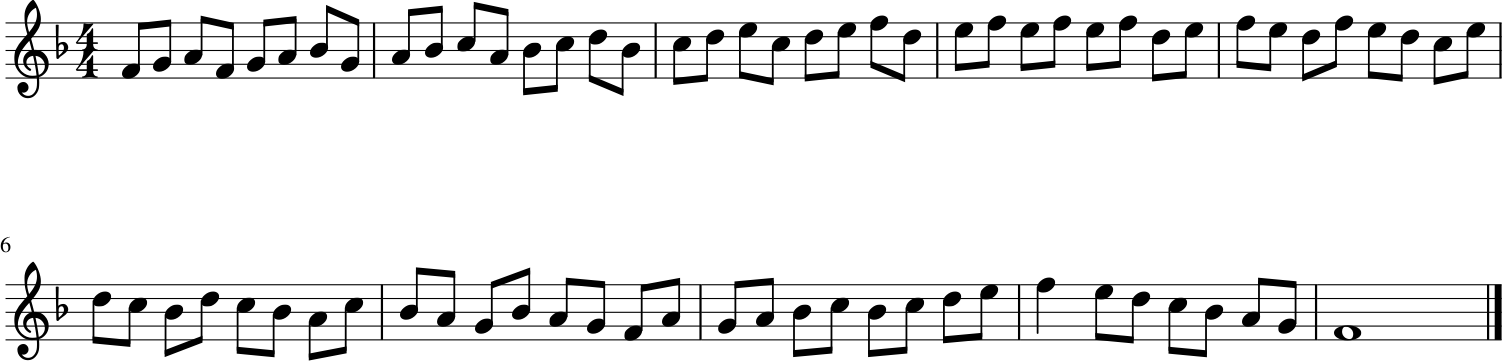

In [20]:
from music21 import *
import re

def transpose(orig_stream, from_key, to_key, insert_key_sig=True):
    from_match = re.match(r'(\w)([b\-#])?(\d)?', from_key)
    to_match = re.match(r'(\w[b\-#]?)(\d)?', to_key)
    k = key.Key(to_match[1])
    sig = key.KeySignature(k.sharps)
    
    transpo_interval = interval.Interval(
        pitch.Pitch(from_key),
        pitch.Pitch(to_key)
    )

    sNew = orig_stream.transpose(transpo_interval)
    
    if insert_key_sig is True:
        sNew.getElementsByClass('Measure').next().insert(0, sig)

    return sNew

def transpose_and_append(orig_stream, incr_stream, from_key, to_key):
    k = key.Key(to_key)
    sig = key.KeySignature(k.sharps)
    
    transpo_interval = interval.Interval(
        pitch.Pitch(from_key),
        pitch.Pitch(to_key)
    )

    sNew = transpose(incr_stream, from_key, to_key)#incr_stream.transpose(transpo_interval)
    #sNew.getElementsByClass('Measure').next().insert(0, sig)
    #sNew.show()
    #print()
    s3 = stream.Stream()
    s3.append(
        list(orig_stream.flat.elements)
    )
    s3.append(k)
    s3.append(list(sNew.flat.notesAndRests))
    
    return s3

def transpose_helper(orig_stream, incr_stream, from_key, to_key):
    k = key.Key(to_key)
    sig = key.KeySignature(k.sharps)
    
    transpo_interval = interval.Interval(
        pitch.Pitch(from_key),
        pitch.Pitch(to_key)
    )

    sNew = transpose(incr_stream, from_key, to_key)#incr_stream.transpose(transpo_interval)
    sNew.getElementsByClass('Measure').next().insert(0, sig)

    return sNew
    
circle_of_fifths = ['C4', 'G', 'D', 'A', 'E', 'B3', 'F#', 'D-', 'A-3', 'E-', 'B-3', 'F']

for k in circle_of_fifths[1:]:
    scores[k] = transpose(scores['C'], 'C4', k)

scores['F'].show()


In [6]:
scores['F'].write('midi', 'speed_study.mid')

'speed_study.mid'

In [ ]:
#B_version = transpose(s, 'C4', 'F#3', True)
B_version.show()

In [ ]:
import re

m = re.match(r'(\w)([b\-#])?(\d)?', 'Bb4')
m[1]